In [2]:
from pyrouge import Rouge155
from pprint import pprint

# Here's an example of ROUGE

In [3]:
ref_texts = {'A': "Poor nations pressurise developed countries into granting trade subsidies.",
             'B': "Developed countries should be pressurized. Business exemptions to poor nations.",
             'C': "World's poor decide to urge developed nations for business concessions."}
summary_text = "Poor nations demand trade subsidies from developed nations."

In [24]:
rouge = Rouge155(n_words=100)
score = rouge.score_summary(summary_text, ref_texts)
pprint(score)

{'rouge_1_f_score': 0.76879,
 'rouge_1_f_score_cb': 0.76879,
 'rouge_1_f_score_ce': 0.76879,
 'rouge_1_precision': 0.86928,
 'rouge_1_precision_cb': 0.86928,
 'rouge_1_precision_ce': 0.86928,
 'rouge_1_recall': 0.68912,
 'rouge_1_recall_cb': 0.68912,
 'rouge_1_recall_ce': 0.68912,
 'rouge_2_f_score': 0.52941,
 'rouge_2_f_score_cb': 0.52941,
 'rouge_2_f_score_ce': 0.52941,
 'rouge_2_precision': 0.6,
 'rouge_2_precision_cb': 0.6,
 'rouge_2_precision_ce': 0.6,
 'rouge_2_recall': 0.47368,
 'rouge_2_recall_cb': 0.47368,
 'rouge_2_recall_ce': 0.47368,
 'rouge_3_f_score': 0.39521,
 'rouge_3_f_score_cb': 0.39521,
 'rouge_3_f_score_ce': 0.39521,
 'rouge_3_precision': 0.44898,
 'rouge_3_precision_cb': 0.44898,
 'rouge_3_precision_ce': 0.44898,
 'rouge_3_recall': 0.35294,
 'rouge_3_recall_cb': 0.35294,
 'rouge_3_recall_ce': 0.35294,
 'rouge_4_f_score': 0.34147,
 'rouge_4_f_score_cb': 0.34147,
 'rouge_4_f_score_ce': 0.34147,
 'rouge_4_precision': 0.38889,
 'rouge_4_precision_cb': 0.38889,
 'rouge_

# Let's do a little experiment

In [40]:
from matplotlib import pyplot as plt
%matplotlib inline

In [72]:
def rouge_experiment(pred_summary, true_summary):
    '''
    ref_texts    example: "Poor nations"
    summary_text example: "Poor nations and developed countries"
    '''
    f1 = []
    rc = []
    pr = []
    ref_texts = {'A': pred_summary}
    summary_text = true_summary

    for i in range(100):
        rouge = Rouge155(n_words=i)
        score = rouge.score_summary(summary_text, ref_texts)
        f1.append(score['rouge_1_f_score'])
        rc.append(score['rouge_1_recall'] )
        pr.append(score['rouge_1_precision'])

    plt.figure(figsize=(20,10))
    plt.ylim(0, 1.05)
    plt.plot(range(100), f1, c='red', label='F1')
    plt.plot(range(100), rc, c='blue', label='Recall')
    plt.plot(range(100), rc, c='green', label='Precision')
    plt.axvline(x=len(pred_summary), c='orange')
    plt.axvline(x=len(true_summary), c='purple')
    plt.legend()
    plt.ylabel("F1, Recall, Precision Score")
    plt.xlabel('Number of words in pyrouge')
    plt.title("ROUGE F1, Recall, and Precision Scores as a function of n_words")
    plt.show()


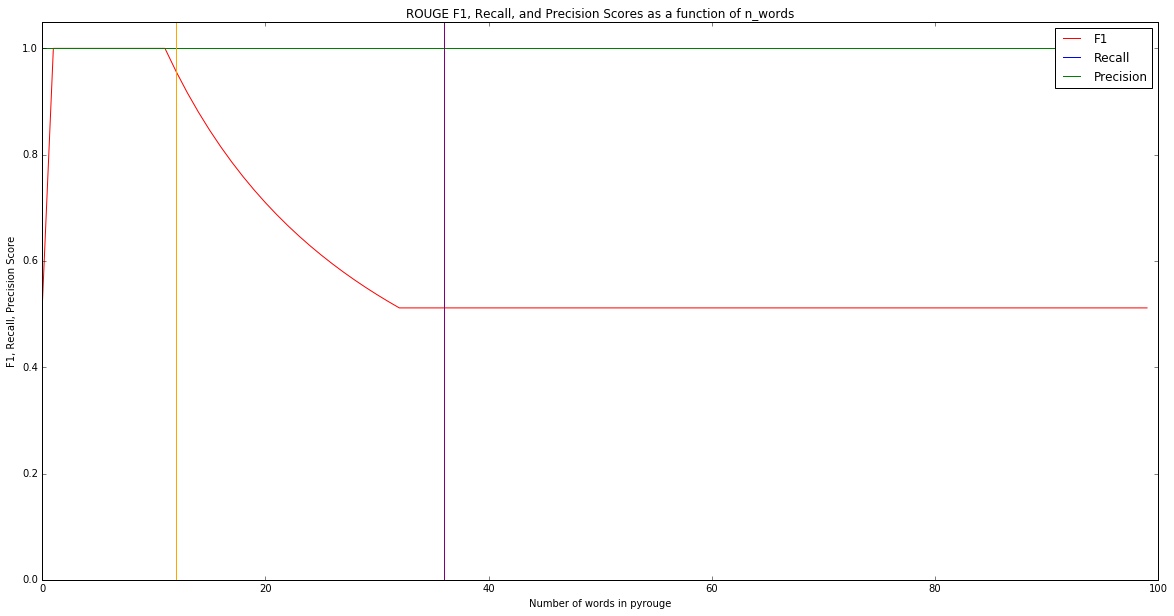

In [73]:
rouge_experiment(pred_summary="Poor nations", true_summary="Poor nations and developed countries")

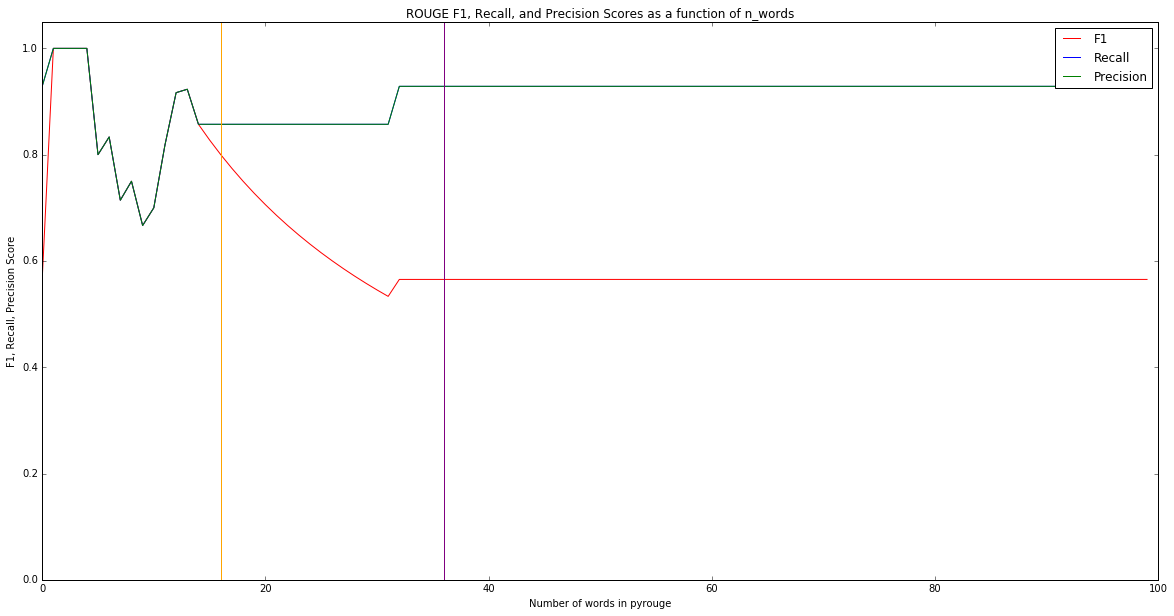

In [74]:
rouge_experiment(pred_summary="Poor ass nations", true_summary="Poor nations and developed countries")

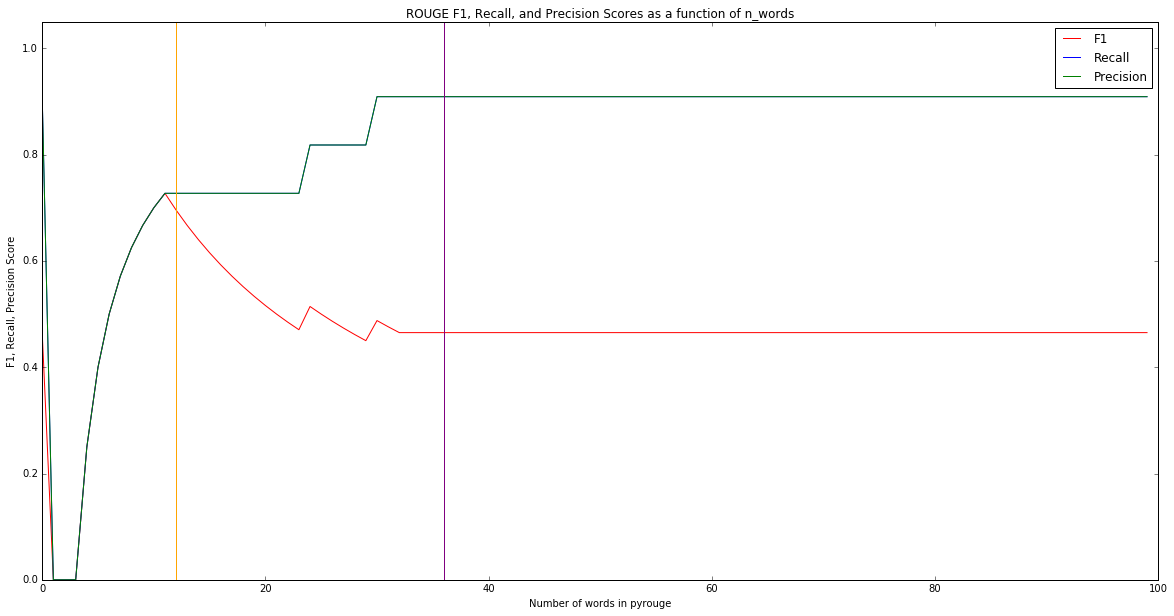

In [75]:
rouge_experiment(pred_summary="Rich nations", true_summary="Poor nations and developed countries")

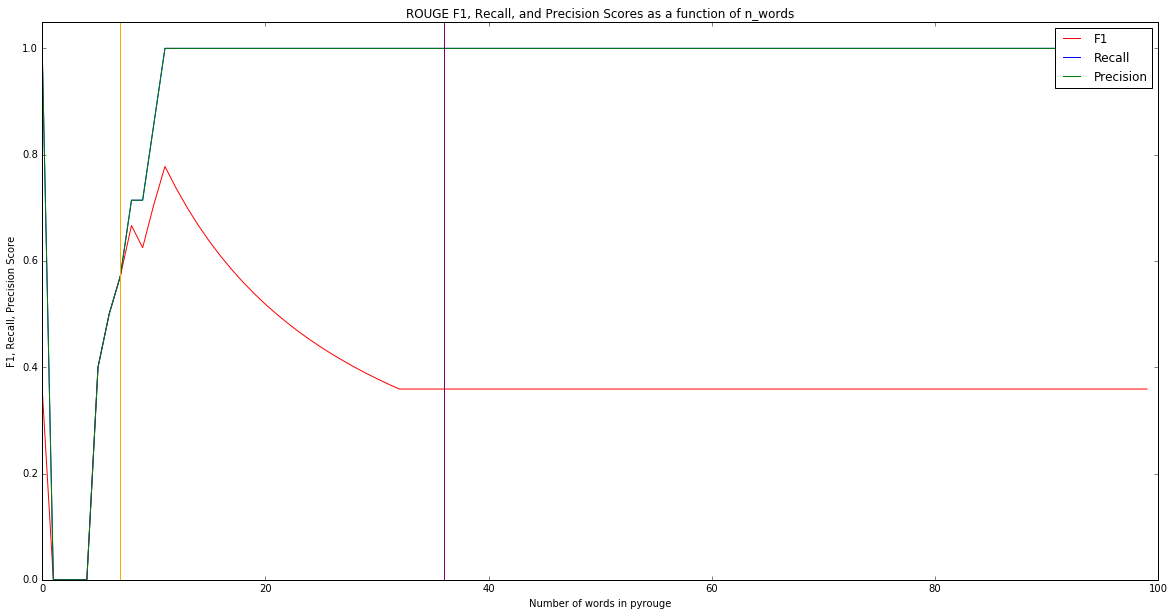

In [77]:
rouge_experiment(pred_summary="nations", true_summary="Poor nations and developed countries")

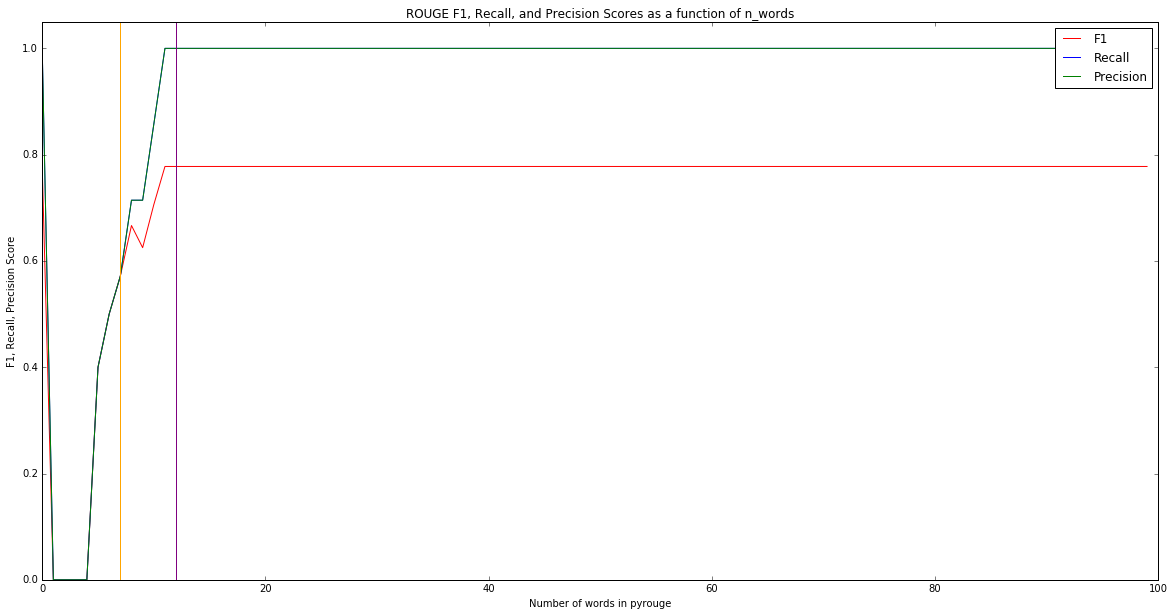

In [78]:
rouge_experiment(pred_summary="nations", true_summary="Poor nations")

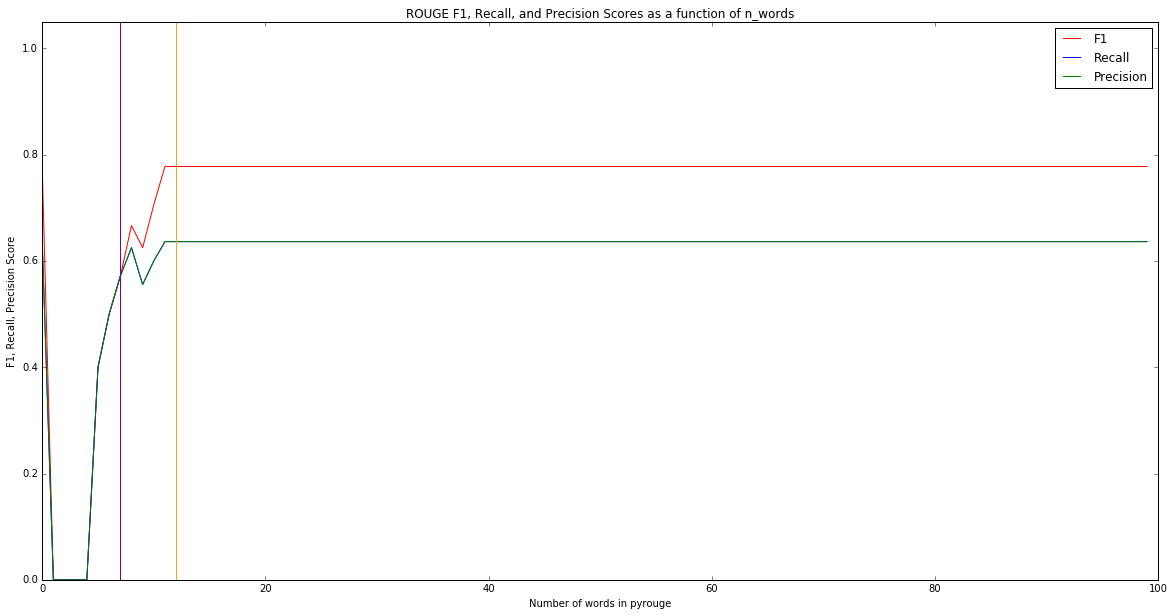

In [79]:
rouge_experiment(pred_summary="Poor nations", true_summary="nations")

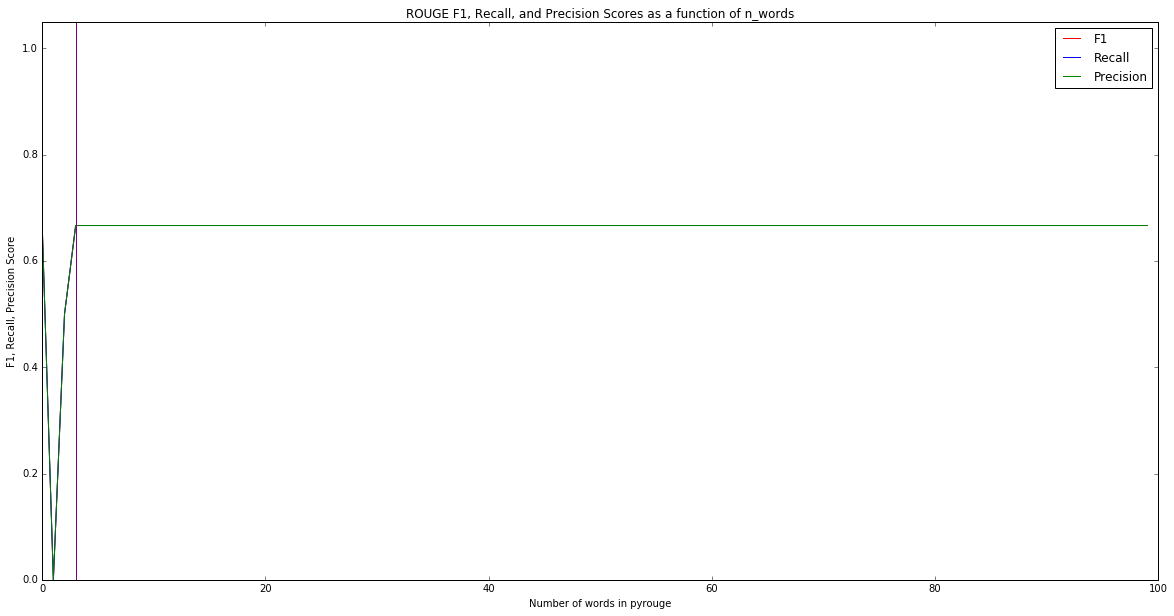

In [80]:
rouge_experiment(pred_summary="gat", true_summary="nat")

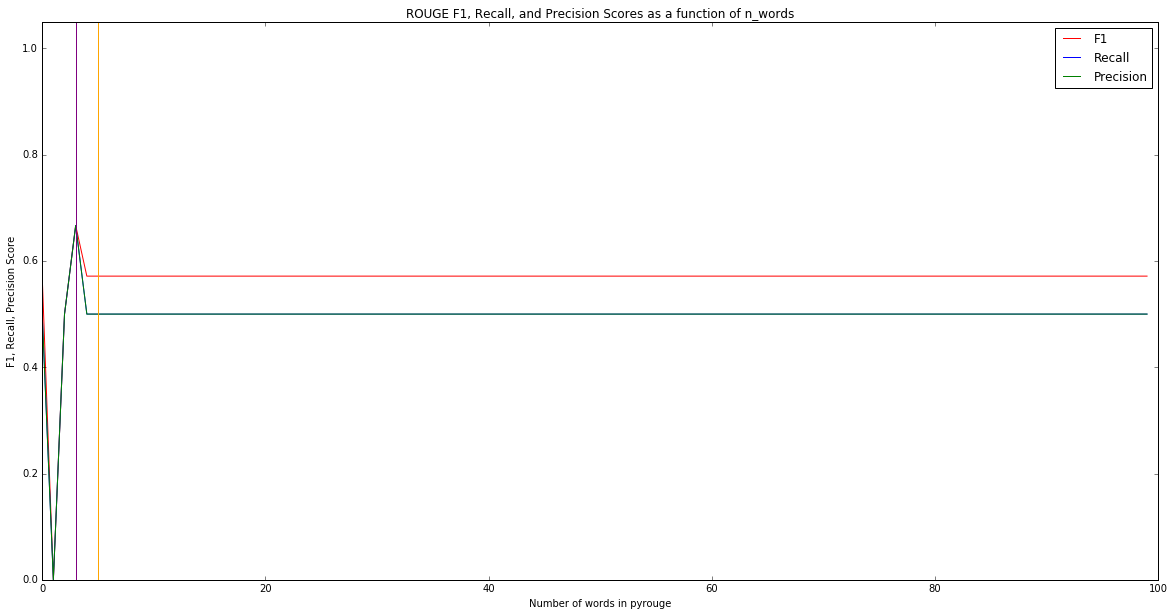

In [81]:
rouge_experiment(pred_summary="gat b", true_summary="nat")

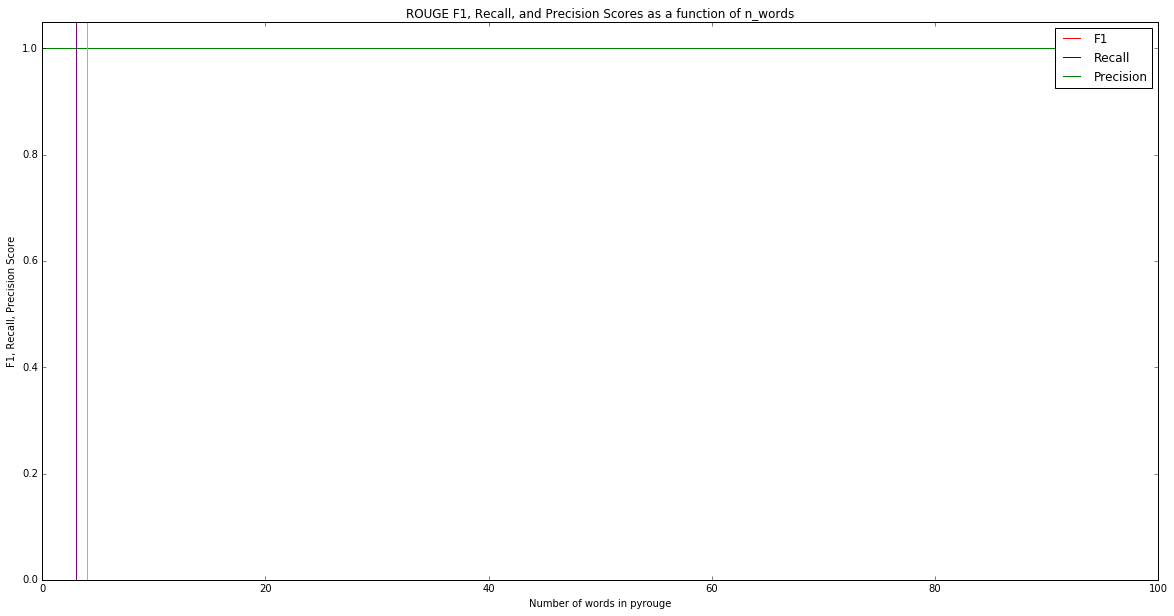

In [82]:
rouge_experiment(pred_summary="nat ", true_summary="nat")

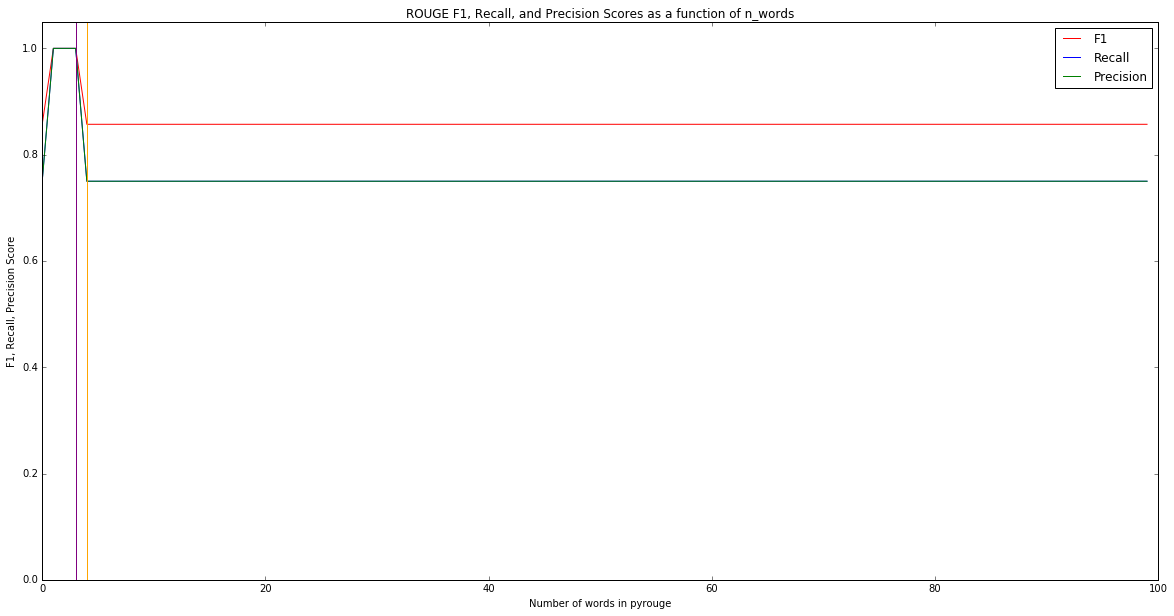

In [83]:
rouge_experiment(pred_summary="natb", true_summary="nat")